#Importing libraries


In [3]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# For uploading files to Colab
from google.colab import files

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


#Loading Data

In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/PROJECT-V/dataset final.xlsx'
df = pd.read_excel(file_path)

print("Dataset loaded successfully! Here's a preview:")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully! Here's a preview:


#Data cleaning

##Handling missing values

In [5]:

print("Checking for missing values:")
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Checking for missing values:
Alpha Constant                          0
Switching Frequency (Hz)                0
Gate Capacitance (F)                    0
Drain/Source Capacitance (F)            0
Total Capacitance (F)                   0
Static Supply Voltage (VDD)             0
Static Drain-Source Voltage (Vds)       0
Static Gate-to-Source Voltage (VGS)     0
Static I_not                            0
Static Vt                               0
Static Threshold Voltage (Vth)          0
Static Subthreshold Slope Factor (N)    0
Static Width (W)                        0
Static Length (L)                       0
Dynamic Power (W)                       0
Static Power (W)                        0
Total Power (W)                         0
dtype: int64

Missing values after cleaning:
Alpha Constant                          0
Switching Frequency (Hz)                0
Gate Capacitance (F)                    0
Drain/Source Capacitance (F)            0
Total Capacitance (F)                   0
St

##removing duplicates

In [6]:

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")



Number of duplicate rows: 0


## Ensuring consistancy

In [7]:

print("\nData types before adjustment:")
print(df.dtypes)

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            pass

print("\nData types after adjustment:")
print(df.dtypes)



Data types before adjustment:
Alpha Constant                          float64
Switching Frequency (Hz)                float64
Gate Capacitance (F)                    float64
Drain/Source Capacitance (F)            float64
Total Capacitance (F)                   float64
Static Supply Voltage (VDD)             float64
Static Drain-Source Voltage (Vds)       float64
Static Gate-to-Source Voltage (VGS)     float64
Static I_not                            float64
Static Vt                               float64
Static Threshold Voltage (Vth)          float64
Static Subthreshold Slope Factor (N)    float64
Static Width (W)                        float64
Static Length (L)                       float64
Dynamic Power (W)                       float64
Static Power (W)                        float64
Total Power (W)                         float64
dtype: object

Data types after adjustment:
Alpha Constant                          float64
Switching Frequency (Hz)                float64
Gate Capacita

#Data Preparation

##Data seperation as X and Y

In [8]:

X = df.drop(columns=['Dynamic Power (W)', 'Static Power (W)', 'Total Power (W)'])

y_total = df['Total Power (W)']

print("Features (X) and Target Variable (y) separated:")
print(f"Features shape: {X.shape}")
print(f"Total Power shape: {y_total.shape}")


Features (X) and Target Variable (y) separated:
Features shape: (25000, 14)
Total Power shape: (25000,)


##Data split for train-test


In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_total, test_size=0.25, random_state=42)

print("Data split into training and testing sets for Total Power:")
print(f"Training Features shape: {X_train.shape}")
print(f"Testing Features shape: {X_test.shape}")
print(f"Training Total Power shape: {y_train.shape}")
print(f"Testing Total Power shape: {y_test.shape}")


Data split into training and testing sets for Total Power:
Training Features shape: (18750, 14)
Testing Features shape: (6250, 14)
Training Total Power shape: (18750,)
Testing Total Power shape: (6250,)


##Data Scaling for SVR

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling complete. Scaled features are ready for SVR and other models.")


Data scaling complete. Scaled features are ready for SVR and other models.


##Model wise data preparation

In [11]:
# Models with unscaled data (Linear Regression, Random Forest, Gradient Boosting)
X_train_no_scale = X_train
X_test_no_scale = X_test

# Scaled data for SVR
X_train_svr = X_train_scaled
X_test_svr = X_test_scaled

print("Data preparation complete. Ready for model training!")


Data preparation complete. Ready for model training!


#Model Building

##Linear Regression

###Training

In [12]:
from sklearn.linear_model import LinearRegression

total_power_model = LinearRegression()
total_power_model.fit(X_train, y_train)

print("Linear Regression model trained for Total Power!")


Linear Regression model trained for Total Power!


###Making Predictions

In [13]:

y_pred = total_power_model.predict(X_test)
print("Predictions made for Total Power!")


Predictions made for Total Power!


###Evaluating Performance

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Performance Metrics for Total Power:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")




Performance Metrics for Total Power:
R²: 0.9784
MSE: 0.0000
RMSE: 0.0059


###Error Analysis

In [15]:

residuals = y_test - y_pred

mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print(f"Residual Analysis:")
print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals: {std_residual:.4f}")


Residual Analysis:
Mean of Residuals: 0.0001
Standard Deviation of Residuals: 0.0059


###Visualisation

####Scatter plot

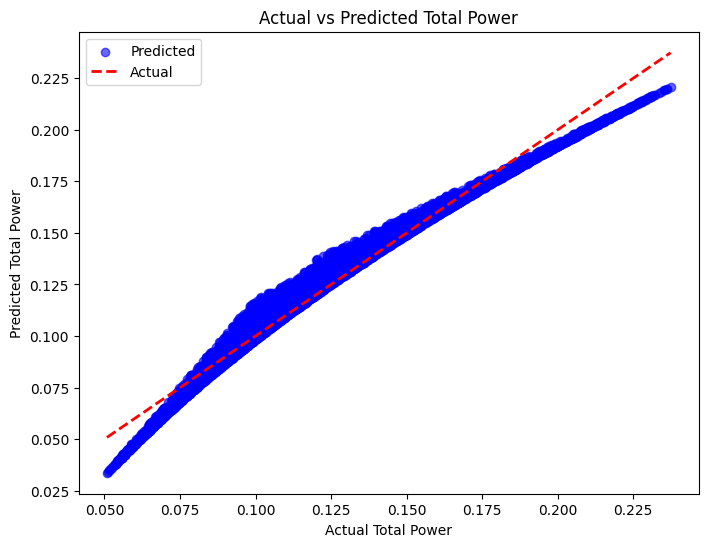

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')  # Predicted points in blue
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Actual')  # Actual line in red
plt.title('Actual vs Predicted Total Power')
plt.xlabel('Actual Total Power')
plt.ylabel('Predicted Total Power')

plt.legend(loc='best')

plt.show()


####Residual Distribution

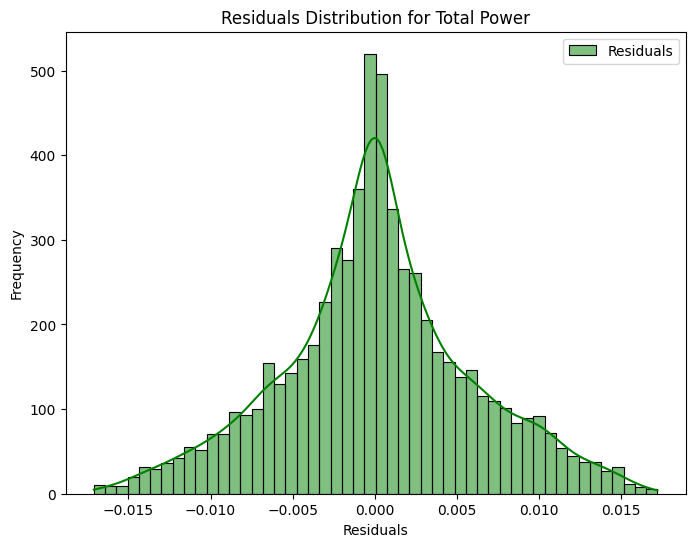

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='green', label='Residuals')
plt.title('Residuals Distribution for Total Power')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.legend(loc='best')
plt.show()


####Heat Map

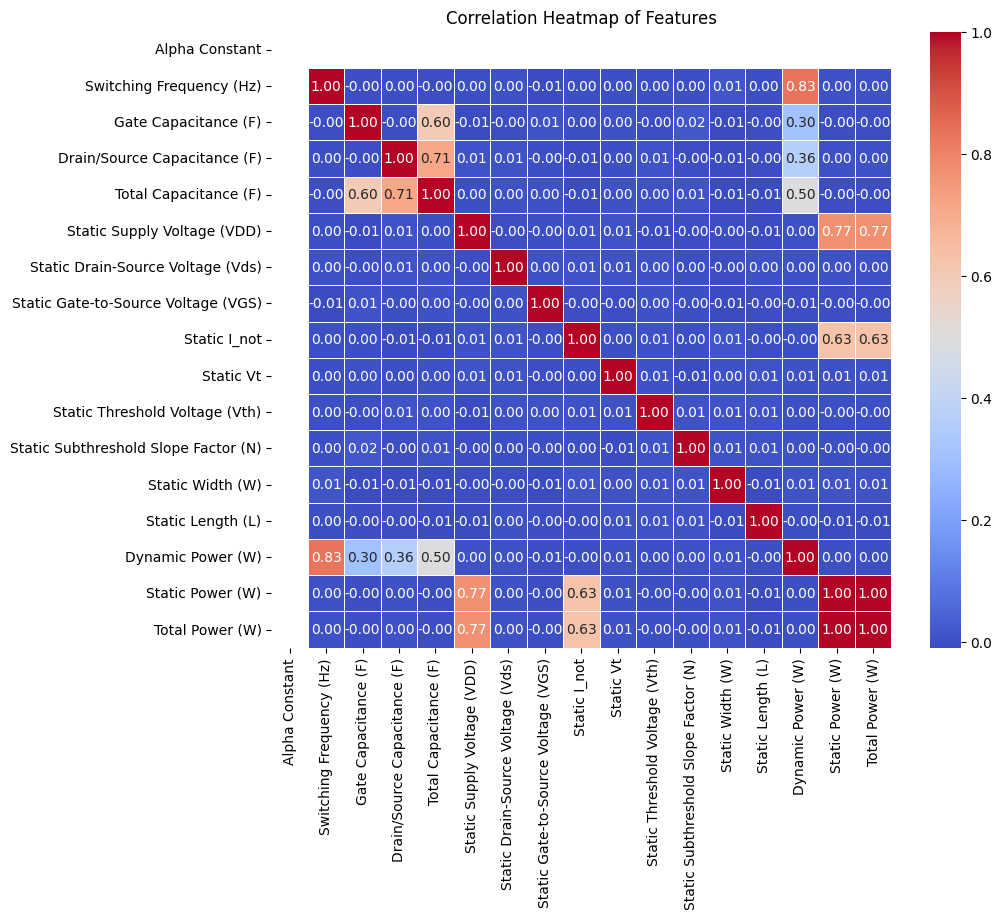

In [18]:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')

plt.show()


## Support Vector Regression (SVR)

###Training

In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train_scaled, y_train)

print("SVR model trained successfully!")


SVR model trained successfully!


###Making Predictions

In [20]:

y_total_pred_svr = svr_model.predict(X_test_scaled)

print("First 5 predicted values of Total Power using SVR:")
print(y_total_pred_svr[:5])


First 5 predicted values of Total Power using SVR:
[0.14419656 0.14419656 0.14419656 0.14419656 0.14419656]


### Evaluating Performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2_svr = r2_score(y_test, y_total_pred_svr)

mse_svr = mean_squared_error(y_test, y_total_pred_svr)

rmse_svr = np.sqrt(mse_svr)

print("SVR Model Performance:")
print(f"R²: {r2_svr:.4f}")
print(f"MSE: {mse_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")


SVR Model Performance:
R²: -0.1792
MSE: 0.0019
RMSE: 0.0434


###Error analysis

In [22]:

residuals_svr = y_test - y_total_pred_svr

mean_residual_svr = np.mean(residuals_svr)
std_residual_svr = np.std(residuals_svr)

print(f"Residual Analysis for SVR Model:")
print(f"Mean of Residuals: {mean_residual_svr:.4f}")
print(f"Standard Deviation of Residuals: {std_residual_svr:.4f}")

Residual Analysis for SVR Model:
Mean of Residuals: -0.0169
Standard Deviation of Residuals: 0.0399


###Visualisation

####Scatter Plot

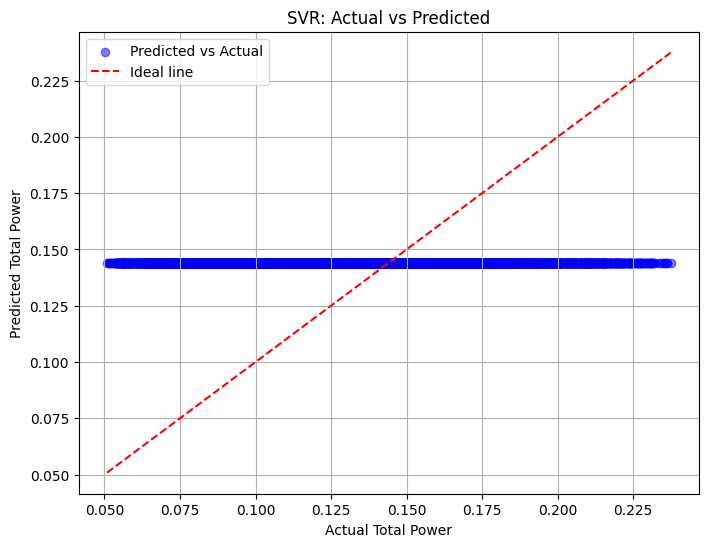

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_total_pred_svr, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line')
plt.title('SVR: Actual vs Predicted')
plt.xlabel('Actual Total Power')
plt.ylabel('Predicted Total Power')
plt.legend()
plt.grid(True)
plt.show()


####Residual Distribution

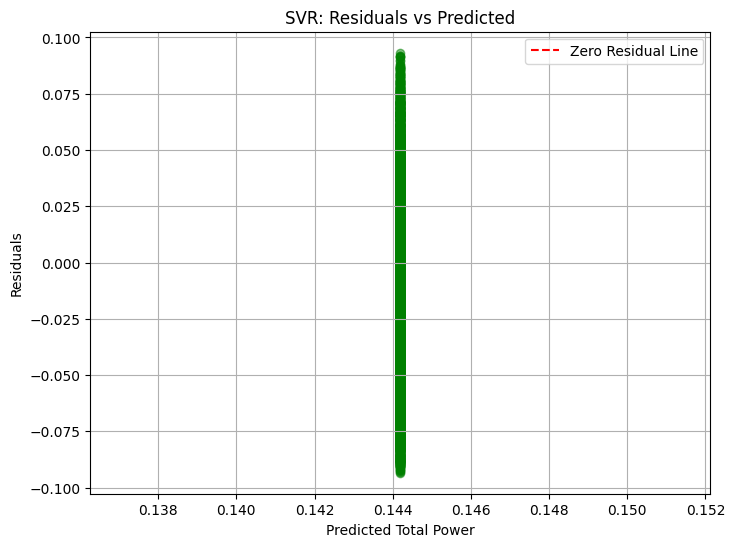

In [24]:
# Residuals plot
plt.figure(figsize=(8,6))
plt.scatter(y_total_pred_svr, residuals_svr, color='green', alpha=0.5)
plt.hlines(0, min(y_total_pred_svr), max(y_total_pred_svr), colors='red', linestyle='--', label='Zero Residual Line')
plt.title('SVR: Residuals vs Predicted')
plt.xlabel('Predicted Total Power')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()


####Heatmap


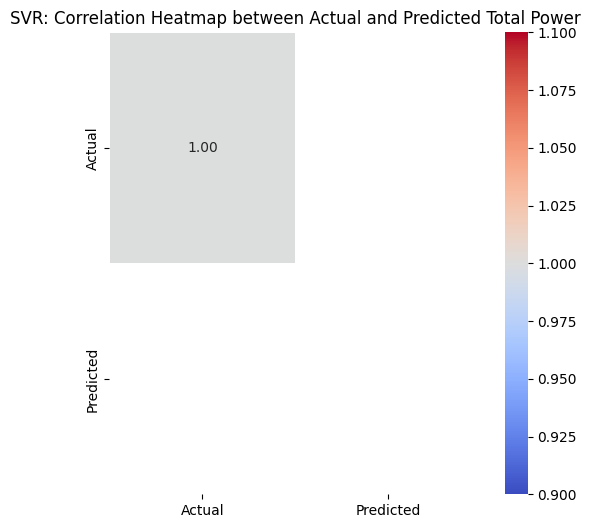

In [25]:
import seaborn as sns
import numpy as np

# Create a DataFrame to calculate correlation
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_total_pred_svr
})

# Compute the correlation matrix
corr_matrix = comparison_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('SVR: Correlation Heatmap between Actual and Predicted Total Power')
plt.show()


##Random Forest with Gradient Boosting

###Training


In [26]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

print("Random Forest and Gradient Boosting models trained successfully!")


Random Forest and Gradient Boosting models trained successfully!


###  Making prediction

In [27]:

y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

y_pred_avg = (y_pred_rf + y_pred_gb) / 2

print("Random Forest Predictions:", y_pred_rf[:5])
print("Gradient Boosting Predictions:", y_pred_gb[:5])
print("Averaged Predictions:", y_pred_avg[:5])


Random Forest Predictions: [0.08015363 0.09455701 0.09260257 0.05390771 0.10137186]
Gradient Boosting Predictions: [0.08071564 0.09460171 0.09339079 0.05418402 0.10121374]
Averaged Predictions: [0.08043463 0.09457936 0.09299668 0.05404586 0.1012928 ]


###Evaluating Performance

In [28]:

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred_avg)
mse = mean_squared_error(y_test, y_pred_avg)
rmse = mse ** 0.5

print("\nPerformance Metrics for Hybrid model Predictions:")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")



Performance Metrics for Hybrid model Predictions:
R²: 0.9997
MSE: 0.0000
RMSE: 0.0006


### Error analysis

In [29]:
# Residual Analysis
residuals = y_test - y_pred_avg

# Mean and standard deviation of residuals
mean_residual = residuals.mean()
std_residual = residuals.std()

# Output the residual analysis
print(f"\nResidual Analysis:")
print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals: {std_residual:.4f}")



Residual Analysis:
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0006


###Visualisation

#### Scatter Plot

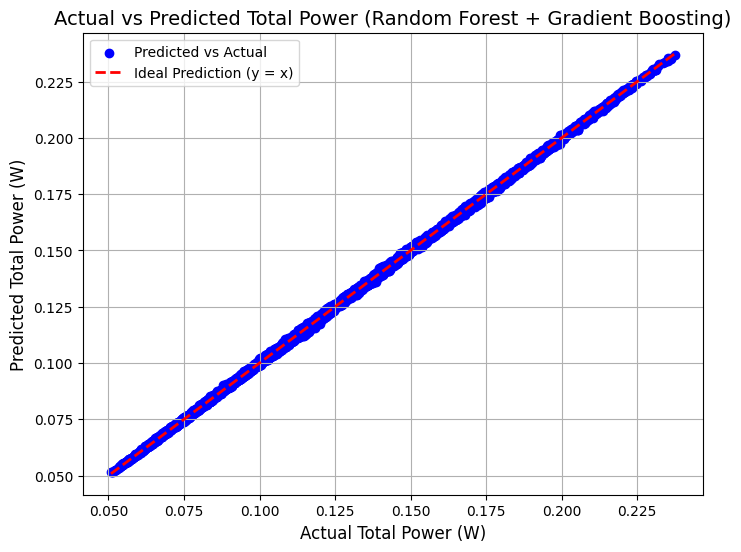

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_avg, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Prediction (y = x)")

plt.xlabel('Actual Total Power (W)', fontsize=12)
plt.ylabel('Predicted Total Power (W)', fontsize=12)
plt.title('Actual vs Predicted Total Power (Random Forest + Gradient Boosting)', fontsize=14)

plt.legend()

plt.grid(True)
plt.show()


#### Residual Distribution

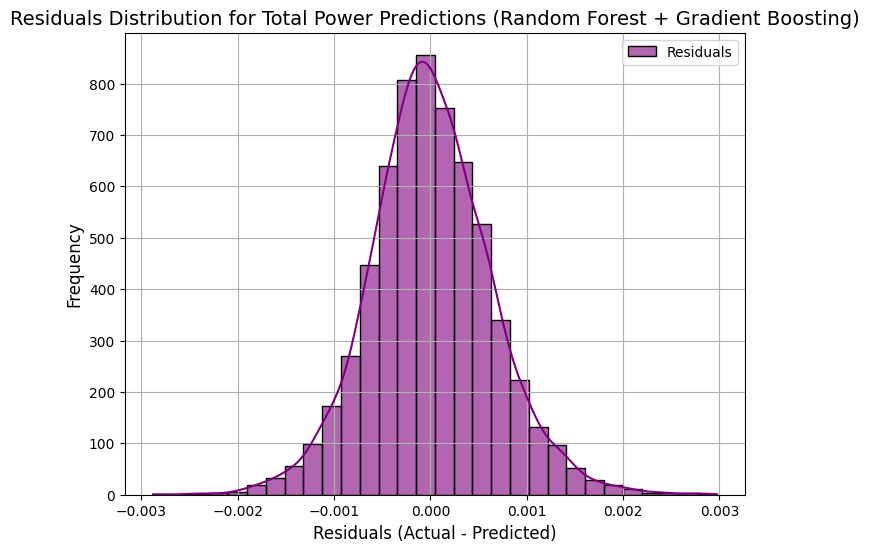

In [31]:
import seaborn as sns

residuals = y_test - y_pred_avg

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30, label='Residuals', alpha=0.6)

plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residuals Distribution for Total Power Predictions (Random Forest + Gradient Boosting)', fontsize=14)

plt.legend()

plt.grid(True)
plt.show()


####Heat Map

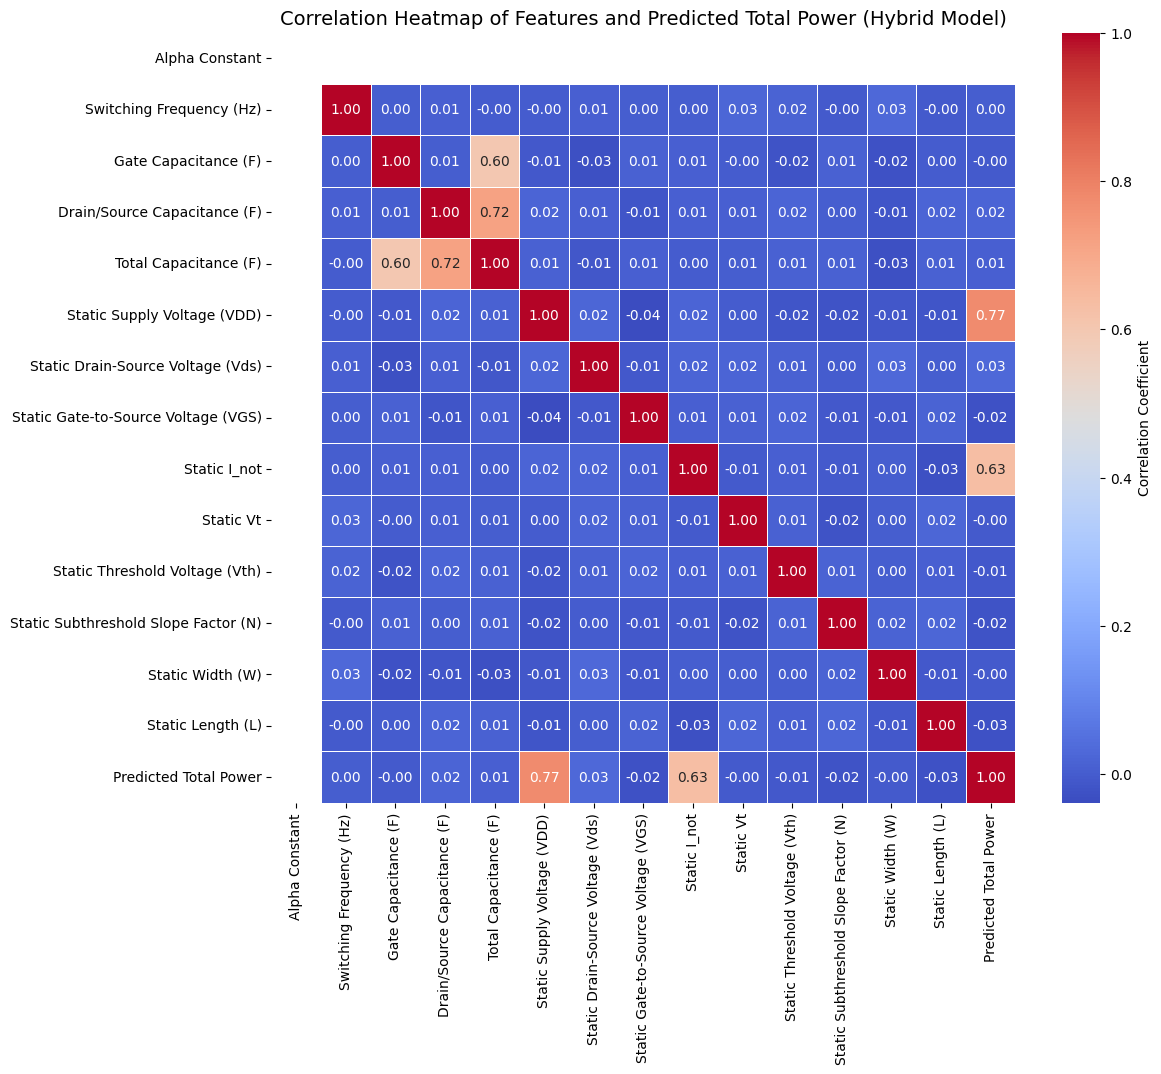

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted Total Power'] = y_pred_avg

corr_matrix = X_test_with_predictions.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap of Features and Predicted Total Power (Hybrid Model)', fontsize=14)

plt.show()


## Using weighted avg

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

r2_rf = rf_model.score(X_test, y_test)
r2_gb = gb_model.score(X_test, y_test)

total_r2 = r2_rf + r2_gb
weight_rf = r2_rf / total_r2
weight_gb = r2_gb / total_r2

y_pred_weighted = weight_rf * y_pred_rf + weight_gb * y_pred_gb

print("Random Forest Predictions:", y_pred_rf[:5])
print("Gradient Boosting Predictions:", y_pred_gb[:5])
print("Weighted Averaged Predictions:", y_pred_weighted[:5])

mse_weighted = mean_squared_error(y_test, y_pred_weighted)
rmse_weighted = np.sqrt(mse_weighted)
r2_weighted = r2_score(y_test, y_pred_weighted)

print("Performance Metrics for Weighted Averaged Predictions:")
print(f"R²: {r2_weighted:.4f}")
print(f"MSE: {mse_weighted:.4f}")
print(f"RMSE: {rmse_weighted:.4f}")


Random Forest Predictions: [0.08015363 0.09455701 0.09260257 0.05390771 0.10137186]
Gradient Boosting Predictions: [0.08071564 0.09460171 0.09339079 0.05418402 0.10121374]
Weighted Averaged Predictions: [0.08043453 0.09457936 0.09299653 0.05404581 0.10129283]
Performance Metrics for Weighted Averaged Predictions:
R²: 0.9997
MSE: 0.0000
RMSE: 0.0006


## Using Stacking model

In [34]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

base_models = [
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model)
]

meta_model = LinearRegression()
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacked_model.fit(X_train, y_train)

y_pred_stacked = stacked_model.predict(X_test)

print("Stacked Model Predictions:", y_pred_stacked[:5])

mse_stacked = mean_squared_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mse_stacked)
r2_stacked = r2_score(y_test, y_pred_stacked)

print("Performance Metrics for Stacked Model:")
print(f"R²: {r2_stacked:.4f}")
print(f"MSE: {mse_stacked:.4f}")
print(f"RMSE: {rmse_stacked:.4f}")

residuals = y_test - y_pred_stacked
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)

print("\nResidual Analysis for Stacked Model:")
print(f"Mean of Residuals: {mean_residual:.4f}")
print(f"Standard Deviation of Residuals: {std_residual:.4f}")


Stacked Model Predictions: [0.08012847 0.09451868 0.09260902 0.05382814 0.10132997]
Performance Metrics for Stacked Model:
R²: 0.9999
MSE: 0.0000
RMSE: 0.0004

Residual Analysis for Stacked Model:
Mean of Residuals: 0.0000
Standard Deviation of Residuals: 0.0004


###Scatter Plot

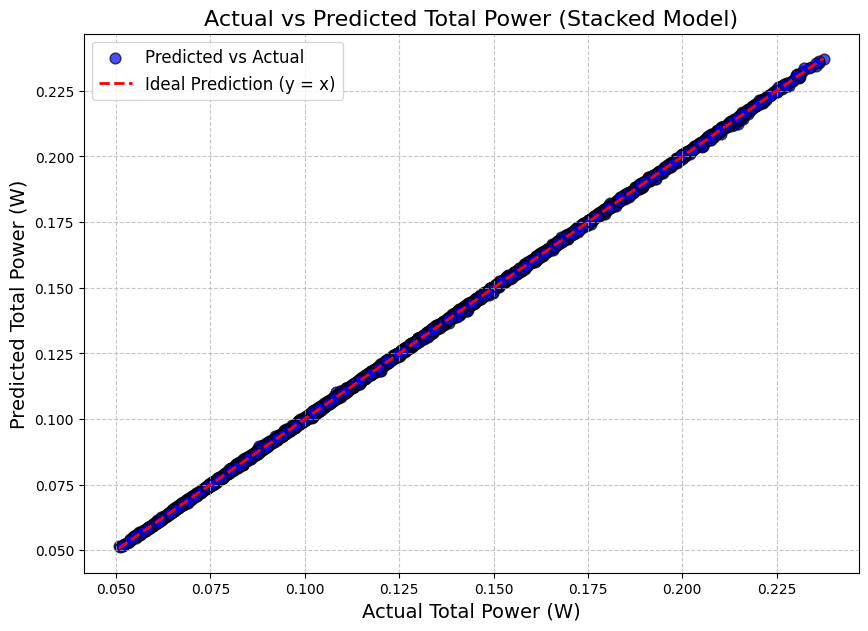

In [35]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_stacked, alpha=0.7, color='blue', edgecolor='k', s=60, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2, label="Ideal Prediction (y = x)")
plt.title("Actual vs Predicted Total Power (Stacked Model)", fontsize=16)
plt.xlabel("Actual Total Power (W)", fontsize=14)
plt.ylabel("Predicted Total Power (W)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


###Residual Distribution

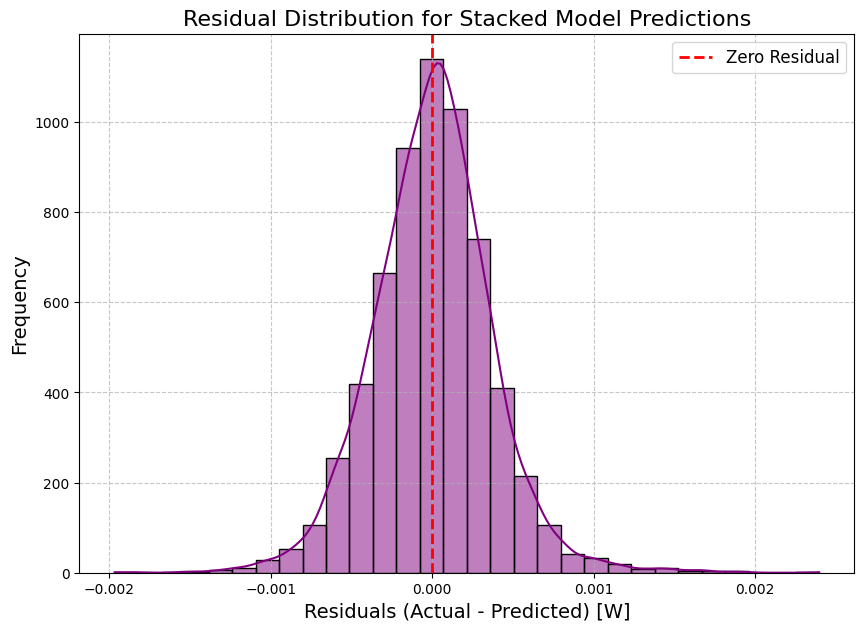

In [36]:
import seaborn as sns
import numpy as np

# Calculate residuals
residuals_stacked = y_test - y_pred_stacked

# Residual distribution plot
plt.figure(figsize=(10, 7))
sns.histplot(residuals_stacked, kde=True, bins=30, color='purple', edgecolor='k')
plt.title("Residual Distribution for Stacked Model Predictions", fontsize=16)
plt.xlabel("Residuals (Actual - Predicted) [W]", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label="Zero Residual")
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


###Heat Map


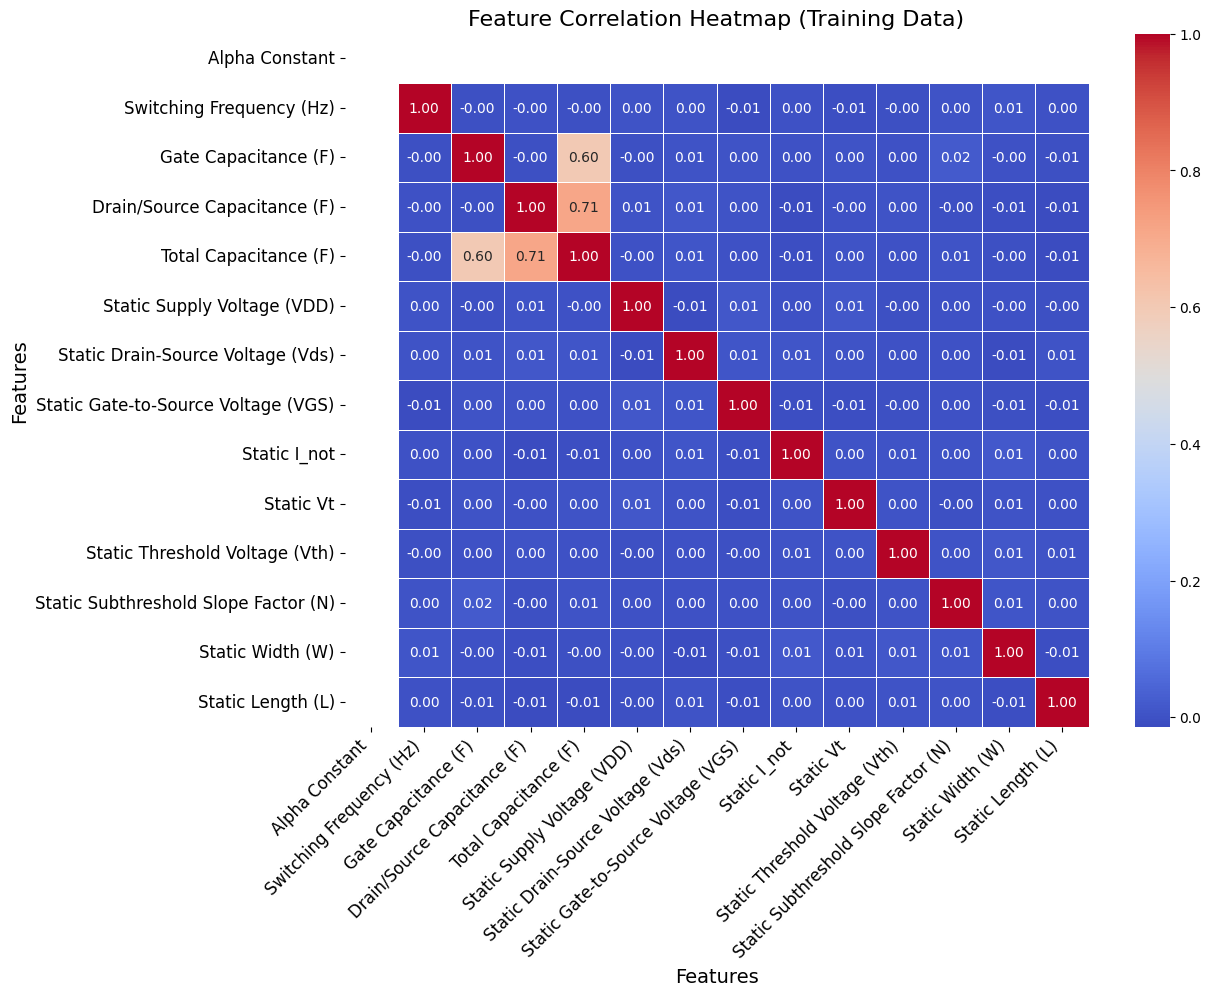

In [37]:
# Heat map of feature correlation
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Training Data)", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()


# Predicting new data


In [38]:
import numpy as np

# Step 1: Prepare your input data (single row or new data point)
single_row = np.array([[0.45, 606492277.5, 4E-15, 3E-15, 9E-15, 1.3, 1.2,
                       0.225242041, 0.168893035, 0.264196792, 0.289964548, 1.302902598,
                       2.579398552, 7.110801]])


predicted_power = stacked_model.predict(single_row)  # Predict using the trained stacked model

print(f"Predicted Total Power (W) for the given input: {predicted_power[0]}")


Predicted Total Power (W) for the given input: 0.20183927466752558
